In [28]:
########################################################################################################################
# Filename: MK-kNN_paragraph_classification.ipynb
#
# Purpose: Multi-label Text-categorization, using k nearest neighbors, for paragraph-level
#          data as part of STAT 6500 final project.

# Author(s): Archit Datar, Laren Contard, Bobby (Robert) Lumpkin
#
# Library Dependencies: numpy, pandas, scikit-learn
########################################################################################################################

# Text categorization with k nearest neighbors

In [1]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from skmultilearn.adapt import MLkNN
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sys
sys.path.append('../ThresholdFunctionLearning')    ## Append path to the ThresholdFunctionLearning directory to the interpreters
                                                   ## search path
plt.style.use('mypaper.mplstyle')
from threshold_learning import predict_test_labels_binary    ## Import the 'predict_test_labels_binary()' function from the 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load and pre-process data

In [2]:
#import data
df = pd.read_csv("../../dataset/content_paragraphs_ready.csv", header=0)

#For the label "education", all values are 0. Thus, it is dropped from the label list. 
label_list = ["threats/impacts", "responses/actions", "severity", 
        "susceptibility", "self-efficacy", "external-efficacy", "response efficacy", 
        "public health", "economy", "political evaluation", "racial conflict", 
        "international ralations/foreign policies", "positive", "negative"] 

print("Maximum value for each label")
display(df[label_list].max(axis=0))

print("Minimum value for each label")
display(df[label_list].min(axis=0))

feature_list = list(df.columns[25:])

df = df[["para_id"] + label_list + feature_list]

df.head()

Maximum value for each label


threats/impacts                             1
responses/actions                           1
severity                                    1
susceptibility                              1
self-efficacy                               1
external-efficacy                           1
response efficacy                           1
public health                               1
economy                                     1
political evaluation                        1
racial conflict                             1
international ralations/foreign policies    1
positive                                    1
negative                                    1
dtype: int64

Minimum value for each label


threats/impacts                             0
responses/actions                           0
severity                                    0
susceptibility                              0
self-efficacy                               0
external-efficacy                           0
response efficacy                           0
public health                               0
economy                                     0
political evaluation                        0
racial conflict                             0
international ralations/foreign policies    0
positive                                    0
negative                                    0
dtype: int64

,para_id,threats/impacts,responses/actions,severity,susceptibility,self-efficacy,external-efficacy,response efficacy,public health,economy,political evaluation,racial conflict,international ralations/foreign policies,positive,negative,murphi,martha,defacto,stay,home,state,million,us,you�,re,absolut,right,number,gone,dramat,expect,told,folk,happen,part,it�,s,due,communiti,spread,big,open,test,aggress,fact,matter,they�,alreadi,get,messag,we�,enforc,think,within,new,jersey,stronger,step,can,take,consid,regular,advisori,add,ve,ll,stark,rememb,back,yesterday,may,much,week,sinc,specimen,collect,yet,see,taken,social,distanc,probabl,won�,t,anoth,gov,phil,d-nj,yes,good,lot,forth,among,three,governor,day,well,white,hous,know,obvious,best,set,america,now,challeng,posit,tragic,dead,garden,peopl,realli,aren�,travel,whole,warn,fine,flatten,curv,continu,way,beaumont,screen,upper,left,friday,march,27th,around,3pm,spoke,mom,today,ask,question,enough,ppe,surg,answer,bring,interest,point,draw,line,protect,help,patient,someth,kind,grappl,moral,feel,uniqu,abl,asthma,worri,sick,hard,meantim,louisiana,differ,york,need,practic,mitig,measur,place,shelter-at-hom,state-wid,slow,everybodi,present,hospit,next,four,whether,stay-at-hom,order,put,go,intend,effect,work,extent,actual,compli,yeah,listen,gotten,shipment,privat,sector,system,shutdown,elect,surgeri,equip,still,short,long,i�,d,say,headlin,ventil,specif,convers,last,night,that�,one,focus,front,made,progress,area,edward,oh,sure,said,like,law,busi,tell,suppos,close,just,larg,group,leav,tend,thousand,church,look,come,upon,success,karl,bad,situat,remain,member,press,corp,came,presum,case,coronavirus,took,tuesday,...,fraught,email,plead,crew,a�,navi,reinstat,milwaukee�,jeanett,kowalik,suspect,found,vote,poll,analyz,connect,service�,movement,older,colorado,ami,bezerra,analysi,medicar,medicaid,serv,net,loss,town,breathtak,multibillion-dollar,bet,candid,globe,streamlin,unrealist,pass,omin,some�,georgia,newly�,batter,rural,peril,must,trigger,cascad,sink,johnson,savannah,religi,worship,none,understood,burden,god,building.�,brian,kemp,barbershop,hair,salon,gym,tattoo,nail,�in,strict,governor�,lesson,eight-person,aboard,sailor,flown,san,antonio,pentagon�,spokesman,jonathan,hoffman,ultraviolet�,light,disinfect,prompt,rebuk,self-treatment.�,ten,unproven,dose,spec,unheard,certainti,any�,arm,people�,dozen,kentucki,gather,state�,capitol,andi,beshear's�,pressur,attorney,daniel,cameron,rein�,beshear,grasp,have�,if�,trusted.�,tests�,will�,by�,southern,arrest,diego,sheriff�,beach,closur,meatpack,plant,midwest,tracking.�,coronavirus:�,kidd,pacif,america.�,33�,destroy,expect�,2.8�,delay,eleventh-hour,bid,block,republican-domin,legislatur,suprem,court,diagnos,ill,walk,port,pentagon,poultri,waiver,outlet,nationwid,miracul,disappear,untest,anti-malaria,ventur,afield,amazon,fedex,ups�,packages.�,carriers�,even�,hit�,bank,accounts�,increasing�,keisha,lanc,bottom,is�,roll,investig,saturday�,wisconsin,thousand�,cheer,steps�,agricultur,program�,existence.�,anthoni,fauci�,vaccine�,preced,typic,years.�,processor,chicken,usual,crowd,onto,lines.�,fatal,statist,state:�,speak,blog,throughout,refresh,inbox�,with�,milwauke,link,wisconsin's�,election�,five,greater,than�,held,express,frustrat,elizabeth,weis,heath,joey,garrison,asha,gilbert,joel,shannon,josh,salman,jaym,fraser,adrianna,rodriguez,grace,hauck,nichola,wu,fritz,sky,chadd,kyle,bagenstose�,kayleigh,mcenani,bristl,tension,newslett,unleash,prosper,preview,moor,coverag,glow,profil,clash,incumb,frequent,unfound
0,214236,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1.684247,1.348455,2.161368,3.118616,3.016311,0.91833,1.207125,1.383217,1.763428,7.311990,2.161368,1.258278,1.812191,2.462398,3.720676,1.763428,1.258278,3.720676,1.559308,3.526856,1.348455,0.809185,1.860338,1.684247,1.258278,1.985277,1.6173,1.492789,2.161368,1.684247,1.985277,1.860338,4.524466,2,3.2346,8.090728,1.684247,1.161368,1.684247,0.871333,1.6173,2.161368,2.842011,1.031034,2.239951,1.860338,1.763428,1.860338,1.985277,3.118616,1.684247

For the label "education", all values are 0. Thus, it is dropped from the label list. 

In [3]:
#Remove columns with no labels and split into training and test sets. 
X = df[feature_list].to_numpy().astype(float)
Y = df[feature_list].to_numpy().astype(float)

Y_gz = Y > 0
no_labels_id = np.where(~Y_gz.any(axis=1))[0]
no_labels_id

np.random.seed(123)
df_train_features, df_test_features, df_train_labels, df_test_labels = train_test_split(df[feature_list], df[label_list], test_size = 0.2) # 80-20 train-test split
df_train_features.shape

(232, 2094)

## Dimensionality reduction
With a train-test split of 80-20, we have 232 training examples. It is recommended online [https://www.quora.com/When-should-I-use-K-Nearest-Neighbors-When-is-it-a-better-algorithm-than-NN-SVM-etc (better citations needed)] that kNN works for a lot of data in low-dimenional space. Thus, we need to shrink the dimension space to as low as possible. So, we try to do a PCA analysis to understand if this is possible up to $p=n$. 

Target cumulative variance: 0.90
Number of principal components: 166


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29,PC-30,PC-31,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,PC-41,PC-42,PC-43,PC-44,PC-45,PC-46,PC-47,PC-48,PC-49,PC-50,PC-51,PC-52,PC-53,PC-54,PC-55,PC-56,PC-57,PC-58,PC-59,PC-60,PC-61,PC-62,PC-63,PC-64,PC-65,PC-66,PC-67,PC-68,PC-69,PC-70,PC-71,PC-72,PC-73,PC-74,PC-75,PC-76,PC-77,PC-78,PC-79,PC-80,PC-81,PC-82,PC-83,PC-84,PC-85,PC-86,PC-87,PC-88,PC-89,PC-90,PC-91,PC-92,PC-93,PC-94,PC-95,PC-96,PC-97,PC-98,PC-99,PC-100,PC-101,PC-102,PC-103,PC-104,PC-105,PC-106,PC-107,PC-108,PC-109,PC-110,PC-111,PC-112,PC-113,PC-114,PC-115,PC-116,PC-117,PC-118,PC-119,PC-120,PC-121,PC-122,PC-123,PC-124,PC-125,PC-126,PC-127,PC-128,PC-129,PC-130,PC-131,PC-132,PC-133,PC-134,PC-135,PC-136,PC-137,PC-138,PC-139,PC-140,PC-141,PC-142,PC-143,PC-144,PC-145,PC-146,PC-147,PC-148,PC-149,PC-150,PC-151,PC-152,PC-153,PC-154,PC-155,PC-156,PC-157,PC-158,PC-159,PC-160,PC-161,PC-162,PC-163,PC-164,PC-165,PC-166
murphi,0.139059,-0.009286,-0.029608,0.049782,0.038532,-0.059796,-0.014329,0.007240,-0.055071,0.006517,0.027427,0.056959,0.007782,-0.008101,-0.054270,0.025147,-0.029069,0.009739,0.061164,0.050592,-0.039747,-0.041642,-0.008940,-0.042570,0.002786,0.062644,0.021497,-0.017507,0.030128,-0.023940,0.028919,0.032478,-0.016646,-0.000184,0.007596,0.019178,-0.025088,-0.025283,-0.018658,0.035246,0.002990,0.008296,-0.005383,0.000914,0.023309,-0.003024,-0.012925,-0.022020,0.025255,-0.030337,-0.019781,0.012659,0.007541,-0.003450,0.002569,0.005045,0.000941,0.027384,0.007864,0.009702,0.027678,-0.017468,0.006007,-0.012034,0.001743,-0.021681,-0.028897,-0.023943,-0.013628,-0.002300,0.026308,-0.029435,-0.030679,0.001812,-0.014494,-0.002972,-0.023471,0.026176,-0.001056,0.004010,-0.006708,-0.017499,0.007152,0.025907,-0.014846,0.012834,0.005164,0.000960,0.000705,-0.030482,0.000826,0.028291,0.012290,-0.003665,-0.023589,-0.004133,0.033047,-0.010717,-0.017259,0.012581,0.014161,-0.015515,-0.006958,-0.031733,-0.002878,0.007639,0.001125,-0.054433,-0.013302,-0.001859,0.018962,0.017040,-0.000614,-0.011513,0.002464,-0.000758,-0.006905,-0.004733,-0.036557,0.061541,-0.031665,-0.003190,-0.026407,0.006632,0.002775,-0.022217,-0.025602,0.010398,0.019861,0.003493,0.003749,-0.014132,-0.006811,-0.004116,-0.015339,-0.002261,0.017154,0.027293,0.006210,-0.025006,0.039421,-0.005983,-0.038901,-0.028150,0.003520,0.031843,-0.002600,0.003527,-0.016497,-0.028702,0.011372,-0.008541,-0.010489,0.049123,0.017000,0.007235,-0.000016,-0.004933,0.010486,-0.036451,-0.005820,0.000462,0.032167,0.011159,0.002529,0.007342
martha,0.081846,-0.001492,0.020041,0.009234,0.044050,-0.019938,0.050543,-0.010037,0.046615,0.002652,-0.037121,-0.068995,0.034901,0.003091,0.014912,-0.006044,0.024929,0.008749,-0.023726,-0.013415,0.011978,-0.024997,-0.021767,-0.004599,0.002324,-0.024023,-0.026857,-0.041489,-0.010445,-0.039168,0.008712,0.017934,-0.014868,-0.020964,-0.015039,0.030966,-0.006653,-0.042286,-0.053248,0.022357,0.007040,-0.032778,-0.001714,-0.017367,-0.014466,0.003376,0.022780,0.020375,-0.022142,-0.020277,0.025827,-0.024582,-0.018917,0.026972,0.023653,0.054160,0.009404,0.001883,-0.030606,-0.019771,0.040110,-0.032770,0.007174,-0.010743,0.044043,0.002523,-0.063494,0.053251,-0.022622,-0.075219,-0.009547,-0.027001,-0.032877,-0.009932,0.008918,0.005917,0.063473,0.001305,0.073068,0.003370,0.044731,-0.083590,-0.012629,-0.024444,0.015750,0.023529,0.004724,-0.029778,0.020285,0.033143,0.021826,-0.046937,0.010945,-0.009641,-0.024377,0.037645,0.068224,-0.022277,0.035402,0.041862,-0.017676,0.013559,-0.010564,0.004179,-0.002249,-0.010240,0.019781,-0.012814,-0.011788,0.020179,-0.005981,0.022466,0.008920,0.009162,-0.024821,0.067057,0.013457,-0.011032,0.017338,-0.003795,-0.021904,-0.004182,-0.003665,-0.009174,-0.008414,-0.062818,0.017629,0.000608,0.056799,0.002527,-0.065191,-0.010380,-0.009916,-0.005362,0.041305,0.103519,-0.033310,-0.007290,-0.038644,0.027135,-0.015128,0.038256,-0

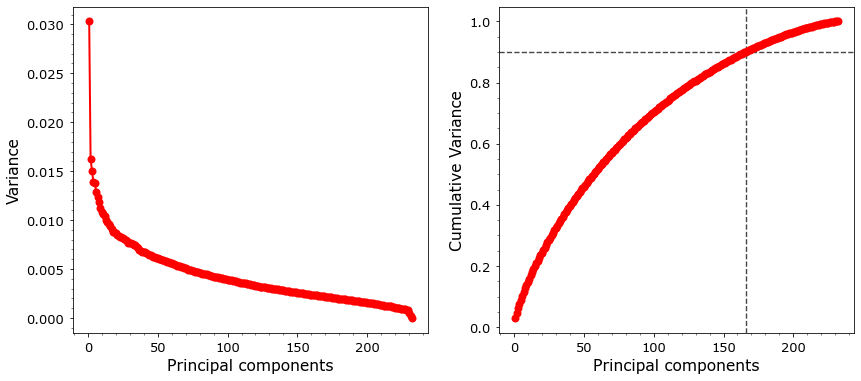

In [4]:
pca = PCA(n_components=df_train_features.shape[0])
pca.fit(df_train_features[feature_list])

PC_values = np.arange(pca.n_components_) + 1

#Scree plot and the cumulative variance tax.
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)
ax1.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
ax1.set_xlabel("Principal components")
ax1.set_ylabel("Variance")

cum_var = np.cumsum(pca.explained_variance_ratio_) #cumulative variance.
target_cum_var = 0.9 #target cumulative variance.
PC_retained = np.where(cum_var>target_cum_var)[0][0] + 1 #Number of principal components retained. 

ax2 = fig.add_subplot(122)
ax2.plot(PC_values, cum_var, 'ro-', linewidth=2)
ax2.set_xlabel("Principal components")
ax2.set_ylabel("Cumulative Variance")
ax2.set_xlim()
ax2.set_ylim()
ax2.hlines(target_cum_var, ax2.get_xlim()[0], ax2.get_xlim()[1], linestyles="--", colors=plt.cm.Greys(200))
ax2.vlines(PC_retained, ax2.get_ylim()[0], ax2.get_ylim()[1], linestyles="--", colors=plt.cm.Greys(200))

print(f"Target cumulative variance: {target_cum_var:.2f}")
print(f"Number of principal components: {PC_retained}")

PC_list = [f"PC-{comp}" for comp in np.arange(1, PC_retained+1)]
#Append the data to the main dataframe and create a component dataframe. 
component_df = pd.DataFrame(pca.components_[:PC_retained],columns=feature_list, index = PC_list)
display(component_df.T)
df_train_features[PC_list] = pca.transform(df_train_features[feature_list])[:, :PC_retained]
df_test_features[PC_list] = pca.transform(df_test_features[feature_list])[:, :PC_retained]


We notice that 165 principal components can describe 90% variance of the data. Thus, dimensionality reduction is possible. The total feature space of 2094 can be reduced to 165 principal components while retaining 90% variance in the data. 

Next, we consider the predictive power of each principal component for each label by considering the difference between the means of positive (1) and negative (0) principal component values to understand if the feature space can be shrunk further. For each principal component, we compute the maximum of this absolute value among all the labels. The largest value of this absolute difference is 3.0. In order to shrink the dimensional space as much as possible for the kNN model to work well, we consider a value below which we will we will ignore the principal components.  

For example, let us consider this target value as 0.3 which is 10% of the maximum 3.0. For the principal component 150, the maximum of the absolute value of the difference between the positive and negative labels is 0.1. Since this value is lesser than 3.0, principal component 150 is ignored. 

Number of principal components with max absolute difference between 1 and 0 label means for cutoff 0.3 : 103


Text(0, 0.5, 'Frequency')

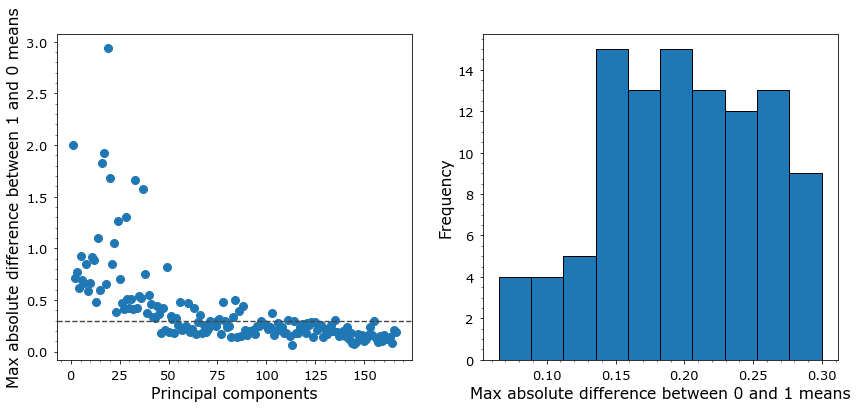

In [5]:
#New dataframe storing the rows as the principal components and columns as the labels with values indicating the difference between the positive and negative means.
df_diff = pd.DataFrame(index=PC_list, columns=label_list)
for label in label_list:
    df_diff[label] = df_train_features.loc[df_train_labels[label]==1, PC_list].mean(axis=0).values - \
                                df_train_features.loc[df_train_labels[label]==0, PC_list].mean(axis=0).values
df_diff["mod_max_diff"] = np.abs(df_diff[label_list]).max(axis=1)

target_difference_cutoff = 0.3 
print("Number of principal components with max absolute difference between 1 and 0 label means for cutoff " + 
      f"{target_difference_cutoff} : {df_diff[df_diff['mod_max_diff']<target_difference_cutoff].shape[0]}")

separable_PC_list = df_diff.loc[df_diff['mod_max_diff']>target_difference_cutoff].index.values

#Plotting the principal components to understand if any of them are particularly useless and can be dropped.
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
ax.scatter(np.arange(1, df_diff.shape[0]+1), df_diff["mod_max_diff"])
ax.set_xlabel("Principal components")
ax.set_ylabel("Max absolute difference between 1 and 0 means")
ax.set_xlim()
ax.hlines(target_difference_cutoff, ax.get_xlim()[0], ax.get_xlim()[1], linestyles="--", color=plt.cm.Greys(200))

ax2 = fig.add_subplot(122)
ax2.hist(df_diff[df_diff["mod_max_diff"]<target_difference_cutoff]["mod_max_diff"])
ax2.set_xlabel("Max absolute difference between 0 and 1 means")
ax2.set_ylabel("Frequency")

Considering a cutoff of 0.3, we find that the 103 principal components can be ignored, reducing the feature space to 62. These principal components are further considered for analysis. 

## Binary Relevance Classification with KNN

In [6]:
## Implement a binary relevance model using KNN classifiers (Naive approach to be compared with ML-KNN, later)
X_train = df_train_features[separable_PC_list].values
y_train = df_train_labels[label_list].values
X_test = df_test_features[separable_PC_list].values
y_test = df_test_labels[label_list].values

br_classifier = BinaryRelevance(
    classifier = kNN()
)

br_classifier.fit(X_train, y_train)

br_train_preds = br_classifier.predict(X_train).toarray()
br_test_preds = br_classifier.predict(X_test).toarray()

print (f"The Hamming loss for the training data is {metrics.hamming_loss(y_train, br_train_preds):.3f}")
print (f"The Hamming loss for the test data is {metrics.hamming_loss(y_test, br_test_preds):.3f}")

The Hamming loss for the training data is 0.139
The Hamming loss for the test data is 0.207


In [7]:
%%capture
from sklearn.model_selection import GridSearchCV

parameters_br = {'n_neighbors': range(1,5)}  
#By default, the Hamming loss as an option is not provided in the scoring string options. So, we will make the Hamming loss funciton as a scorer and use that. 
hamming_scorer = metrics.make_scorer(metrics.hamming_loss)

clf_br = GridSearchCV(kNN(), parameters_br, scoring = hamming_scorer, cv = 5, verbose = 1)
clf_br.fit(X_train, y_train)

In [8]:
best_index_br = np.argmin(clf_br.cv_results_["mean_test_score"])
best_parameters_br = clf_br.cv_results_["params"][best_index_br]

df_CV_br = pd.DataFrame(columns=["Params", "Mean out-of-bag Hamming loss"])
df_CV_br["Params"] = clf_br.cv_results_["params"]
df_CV_br[ "Mean out-of-bag Hamming loss"] = clf_br.cv_results_["mean_test_score"]
display(df_CV_br)
print(f"Best parameters: {best_parameters_br}, Best Hamming loss: {np.min(clf_br.cv_results_['mean_test_score'])}")

,Params,Mean out-of-bag Hamming loss
0,{'n_neighbors': 1},0.222644
1,{'n_neighbors': 2},0.220807
2,{'n_neighbors': 3},0.203865
3,{'n_neighbors': 4},0.212488


Best parameters: {'n_neighbors': 3}, Best Hamming loss: 0.2038654684815647


In [9]:
#Threshold learning
#using the best parameters from the cross-validation with original threshold. 
classifier_best_br = BinaryRelevance(
    classifier = kNN(n_neighbors = 3)
)
classifier_best_br.fit(X_train, y_train)
y_train_pred_best_br = classifier_best_br.predict(X_train)
y_train_pred_best_array_br = y_train_pred_best_br.toarray()
y_test_pred_best_br = classifier_best_br.predict(X_test)
y_test_pred_best_array_br = y_test_pred_best_br.toarray()

print (f"Best parameters: The Hamming loss training data is {metrics.hamming_loss(y_train, y_train_pred_best_array_br):.3f}")
print (f"Best parameters: The Hamming loss test data is {metrics.hamming_loss(y_test, y_test_pred_best_array_br):.3f}")

#using the best parameters
y_train_pred_proba = classifier_best_br.predict_proba(X_train)
y_train_pred_proba_array = y_train_pred_proba.toarray()
y_test_pred_proba = classifier_best_br.predict_proba(X_test)
y_test_pred_proba_array = y_test_pred_proba.toarray()

t_range = (0, 1)

test_labels_binary, threshold_function = predict_test_labels_binary(y_train_pred_proba_array, y_train, y_test_pred_proba_array, t_range)
print (f"Best parameters with threshold function learning: Hamming loss Test set is {metrics.hamming_loss(y_test, test_labels_binary)}")

Best parameters: The Hamming loss training data is 0.110
Best parameters: The Hamming loss test data is 0.202
Best parameters with threshold function learning: Hamming loss Test set is 0.2684729064039409


## ML-kNN

With the dimensionality reduced from 2094 to 62 components, we can now apply the ML-kNN model to understand its prediction performance.

In [72]:
X_train = df_train_features[separable_PC_list].values
y_train = df_train_labels[label_list].values
X_test = df_test_features[separable_PC_list].values
y_test = df_test_labels[label_list].values

classifier = MLkNN(k=3)
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
y_train_pred_array = y_train_pred.toarray()
y_test_pred = classifier.predict(X_test)
y_test_pred_array = y_test_pred.toarray()

print (f"The Hamming loss for the training data is {metrics.hamming_loss(y_train, y_train_pred_array):.3f}")
print (f"The Hamming loss for the test data is {metrics.hamming_loss(y_test, y_test_pred_array):.3f}")


/Users/architdatar/anaconda3/envs/virtual_workspace/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


The Hamming loss for the training data is 0.101
The Hamming loss for the test data is 0.196


Obtaining the test error rate as 19.6% is an encouraging result. Even with k=3, the model does better than the stipid model which always predicts an error rate of 23% (as per Bobby's calculations). 

## Model improvement
The next steps are to understand the best values of k by performing cross-validation, learning a suitable threshold, and weighting to adjust for the skew (optional). 

In [105]:
%%capture
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(1,5), 's': [1.0, 1.5, 2.5, 5.0, 10.0]}  
#By default, the Hamming loss as an option is not provided in the scoring string options. So, we will make the Hamming loss funciton as a scorer and use that. 
hamming_scorer = metrics.make_scorer(metrics.hamming_loss)

clf = GridSearchCV(MLkNN(), parameters, scoring=hamming_scorer, cv=5, verbose=1)
clf.fit(X_train, y_train)

In [107]:
best_index = np.argmin(clf.cv_results_["mean_test_score"])
best_parameters = clf.cv_results_["params"][best_index]

df_CV = pd.DataFrame(columns=["Params", "Mean out-of-bag Hamming loss"])
df_CV["Params"] = clf.cv_results_["params"]
df_CV[ "Mean out-of-bag Hamming loss"] = clf.cv_results_["mean_test_score"]
display(df_CV)
print(f"Best parameters: {best_paramters}, Best Hamming loss: {np.min(clf.cv_results_['mean_test_score'])}")

#We can make a plot of this later. 

,Params,Mean out-of-bag Hamming loss
0,"{'k': 1, 's': 1.0}",0.222644
1,"{'k': 1, 's': 1.5}",0.222644
2,"{'k': 1, 's': 2.5}",0.222644
3,"{'k': 1, 's': 5.0}",0.222023
4,"{'k': 1, 's': 10.0}",0.222023
5,"{'k': 2, 's': 1.0}",0.206713
6,"{'k': 2, 's': 1.5}",0.204870
7,"{'k': 2, 's': 2.5}",0.205491
8,"{'k': 2, 's': 5.0}",0.198996
9,"{'k': 2, 's': 10.0}",0.194040


Best parameters: {'k': 3, 's': 2.5}, Best Hamming loss: 0.18565481696841551


In [119]:
#Threshold learning
#using the best parameters from the cross-validation with original threshold. 
classifier_best = MLkNN(k=3, s=2.5)
classifier_best.fit(X_train, y_train)
y_train_pred_best = classifier_best.predict(X_train)
y_train_pred_best_array = y_train_pred_best.toarray()
y_test_pred_best = classifier_best.predict(X_test)
y_test_pred_best_array = y_test_pred_best.toarray()

print (f"Best parameters: The Hamming loss training data is {metrics.hamming_loss(y_train, y_train_pred_best_array):.3f}")
print (f"Best parameters: The Hamming loss test data is {metrics.hamming_loss(y_test, y_test_pred_best_array):.3f}")

#using the best parameters
classifier_CV = MLkNN(k=3, s=2.5)
classifier_CV.fit(X_train, y_train)
y_train_pred_proba = classifier_CV.predict_proba(X_train)
y_train_pred_proba_array = y_train_pred_proba.toarray()
y_test_pred_proba = classifier_CV.predict_proba(X_test)
y_test_pred_proba_array = y_test_pred_proba.toarray()

t_range = (0, 1)

test_labels_binary, threshold_function = predict_test_labels_binary(y_train_pred_proba_array, y_train, y_test_pred_proba_array, t_range)
print (f"Best parameters with threshold function learning: Hamming loss Test set is {metrics.hamming_loss(y_test, test_labels_binary)}")

/Users/architdatar/anaconda3/envs/virtual_workspace/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Best parameters: The Hamming loss training data is 0.101
Best parameters: The Hamming loss test data is 0.196


/Users/architdatar/anaconda3/envs/virtual_workspace/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Best parameters with threshold function learning: Hamming loss Test set is 0.2229064039408867


## Observations
1. The Hamming loss for the test set seems to be around 20%. This is a slight improvement from the stupid classifier, but is it enough? Will have to justify. 
2. Somehow, the Hamming loss without threshold learning is lower than Hamming loss with threshold learning. Not sure why this is. 

## Future directions
1. Are there any other ways to improve learning for this system? 
2. Would unsupervised learning help? Since we have a good amount of data, but limited capability to label it. Maybe not for class project, but later on, look into unsupervised learning for multi-label classification. 

# Questions:
1. For kNN, how many dimensions versus should we be using? 
2. For PCA, typically, how much variance explained is considered good enough? How is that determined? 